In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('..\data\AmesHousing.txt',delimiter = '\t')
train = data.iloc[0:1460]
test = data.iloc[1460:]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

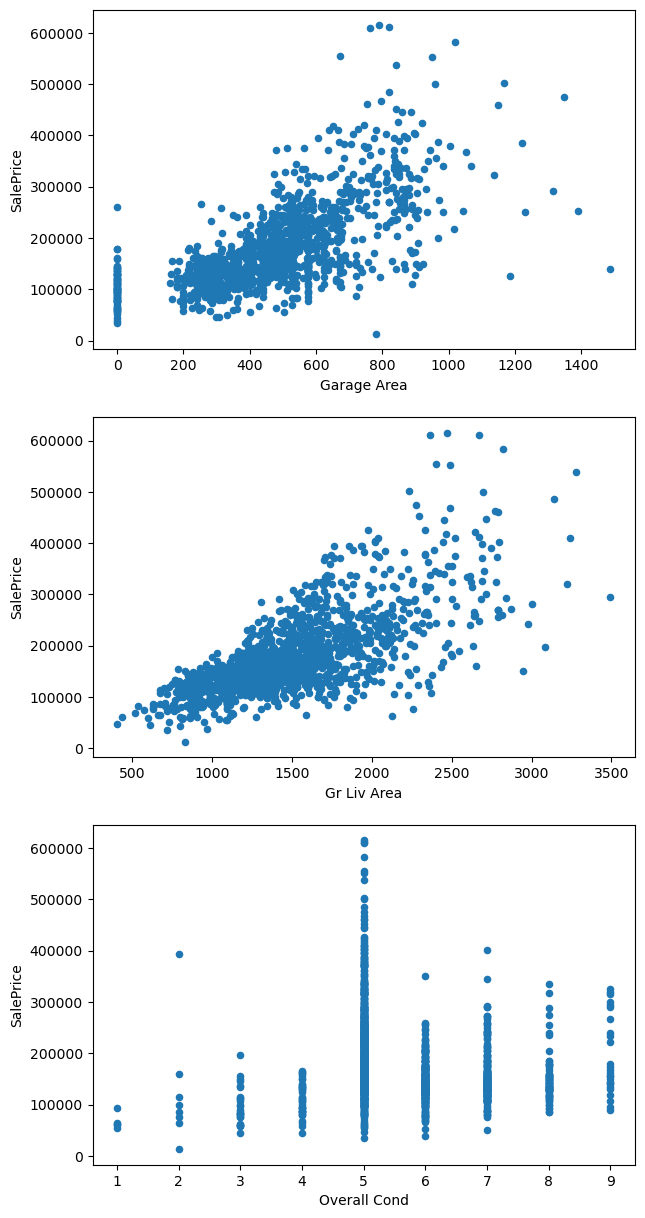

In [12]:
target = "SalePrice"
fig = plt.figure(figsize=(7,15))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

train.plot(x = 'Garage Area',y=target,ax =ax1, kind="scatter")
train.plot(x = 'Gr Liv Area',y=target,ax =ax2, kind="scatter")
train.plot(x = 'Overall Cond',y=target,ax =ax3, kind="scatter")

plt.show()

## calcul de correlation

In [17]:
train[['Garage Area','Gr Liv Area', 'Overall Cond','SalePrice']].corr()

,Garage Area,Gr Liv Area,Overall Cond,SalePrice
Garage Area,1.000000,0.465366,-0.132401,0.662397
Gr Liv Area,0.465366,1.000000,-0.133710,0.698990
Overall Cond,-0.132401,-0.133710,1.000000,-0.099395
SalePrice,0.662397,0.698990,-0.099395,1.000000


## regression linéaire sans sclearn

In [48]:
import numpy as np

# Calcul des coefficients
N = len(train)
sum_x = np.sum(train['Gr Liv Area'])
sum_y = np.sum(train['SalePrice'])
sum_xy = np.sum(train['Gr Liv Area'] * train['SalePrice'])
sum_x_squared = np.sum(train['Gr Liv Area'] ** 2)

# Calcul de la pente (a)
a = (N * sum_xy - sum_x * sum_y) / (N * sum_x_squared - sum_x ** 2)

# Calcul de l'intercept (x0)
x0 = (sum_y - a * sum_x) / N

print(f"Coefficient a (pente): {a}")
print(f"Intercept x0 (ordonnée à l'origine): {x0}")


Coefficient a (pente): 116.86624682710489
Intercept x0 (ordonnée à l'origine): 5366.821710056107


## regression linéaire avec sclearn

In [47]:
# y = a1 x + a0
# a1 : coef_ ; a0 : intercept_
#lr.coef_
#lr.intercept_
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train[['Gr Liv Area']], train['SalePrice'])

print(f'coef: {lr.coef_}')
print(f'intercept: {lr.intercept_}')
a0 = lr.intercept_
a1 = lr.coef_

coef: [116.86624683]
intercept: 5366.821710056043


### faire des prédictions

In [51]:
from sklearn.metrics import mean_squared_error

train_predictions = lr.predict(train[['Gr Liv Area']])
test_predictions = lr.predict(test[['Gr Liv Area']])

train_mse = mean_squared_error(train_predictions,train['SalePrice'])
test_mse = mean_squared_error(test_predictions,test['SalePrice'])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

56034.362001412796
57088.25161263909
